In this notebook, I will write a function that gives the number of years that a wrestler has been participating in tournaments since 1983. This is a sort of proxy for age. Note that for players that were wrestling before 1983 this feature will not describe how long they have been in sumo tournaments, as our data begind in 1983.

First, we'll make a pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#Add the path to the folder that contains the data. Makes it easier for each of us to use the notebook
path = "/Users/Kyla/Desktop/ErdosDataScienceWork/Project/data/"
#path = "/Users/es/Projects/erdo/sumo/Erdos-Institute-Fall-2024-Project-Sumo/data/"

df1983 = pd.read_csv(path+str(1983)+'.csv')
df1984 = pd.read_csv(path+str(1984)+'.csv')

df = df1983
for year in range(1984,2020):
    year = str(year)
    dfyear = pd.read_csv(path+year+'.csv')
    df = pd.concat([df, dfyear], axis=0, ignore_index=True)

In [3]:
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1
1,1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0
3,3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,S1e,Mitakeumi,12-3,1,yorikiri,12055,K1w,Endo,8-7,0
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,O2e,Tochinoshin,6-9,0
214785,4987,2019.09,15,6599,O2e,Tochinoshin,6-9,0,yorikiri,6468,O1w,Goeido,10-5,1
214786,4988,2019.09,16,12191,S1w,Takakeisho,(12-3),0,yorikiri,12210,S1e,Mitakeumi,(12-3),1


Chatgpt is going to help me with this.
Here's a function that tells us the year for each row.

In [4]:
df['year'] = df['basho'].astype(str).str.split('.').str[0].astype(int)

In [5]:
# Sort by year.
df = df.sort_values(by=['year'])

# Find the first appearance year for each rikishi1_id.
first_appearance = df.groupby('rikishi1_id')['year'].transform('min')

# Calculate years since first appearance (inclusive).
df['rikishi1_years_in_sumo'] = df['year'] - first_appearance + 1

In [6]:
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win,year,rikishi1_years_in_sumo
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1,1983,1
3663,3663,1983.09,1,4132,J1e,Wakanofuji,0-1 (5-10),0,oshidashi,1337,M13e,Tochitsukasa,1-0 (7-8),1,1983,1
3662,3662,1983.09,1,1337,M13e,Tochitsukasa,1-0 (7-8),1,oshidashi,4132,J1e,Wakanofuji,0-1 (5-10),0,1983,1
3661,3661,1983.09,1,4311,J2e,Hakuryu,0-1 (5-10),0,oshidashi,4118,J1w,Amanoyama,1-0 (11-4),1,1983,1
3660,3660,1983.09,1,4118,J1w,Amanoyama,1-0 (11-4),1,oshidashi,4311,J2e,Hakuryu,0-1 (5-10),0,1983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211457,1659,2019.03,10,12291,M8e,Asanoyama,7-3 (7-8),1,hatakikomi,12051,M15e,Ishiura,6-4 (6-9),0,2019,3
211456,1658,2019.03,10,12051,M15e,Ishiura,6-4 (6-9),0,hatakikomi,12291,M8e,Asanoyama,7-3 (7-8),1,2019,6
211455,1657,2019.03,10,6491,M9w,Ikioi,1-9 (2-13),0,yorikiri,5967,M12w,Yoshikaze,7-3 (10-5),1,2019,10
211462,1664,2019.03,10,11728,M7w,Takarafuji,4-6 (8-7),0,tsukiotoshi,11934,M5e,Chiyotairyu,6-4 (8-7),1,2019,10


Let's sort the the rows again so we can be back to where we started.

In [7]:
df = df.sort_values(by=['year','index'])

df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win,year,rikishi1_years_in_sumo
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1,1983,1
1,1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0,1983,1
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0,1983,1
3,3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1,1983,1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1,1983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,S1e,Mitakeumi,12-3,1,yorikiri,12055,K1w,Endo,8-7,0,2019,5
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,O2e,Tochinoshin,6-9,0,2019,14
214785,4987,2019.09,15,6599,O2e,Tochinoshin,6-9,0,yorikiri,6468,O1w,Goeido,10-5,1,2019,13
214786,4988,2019.09,16,12191,S1w,Takakeisho,(12-3),0,yorikiri,12210,S1e,Mitakeumi,(12-3),1,2019,4


To get the features in an order that makes more sense, let's put our new column right after rikishi1_id. (We can leave year at the end.)

In [8]:
features = df.columns
features

Index(['index', 'basho', 'day', 'rikishi1_id', 'rikishi1_rank',
       'rikishi1_shikona', 'rikishi1_result', 'rikishi1_win', 'kimarite',
       'rikishi2_id', 'rikishi2_rank', 'rikishi2_shikona', 'rikishi2_result',
       'rikishi2_win', 'year', 'rikishi1_years_in_sumo'],
      dtype='object')

In [9]:
new_order = ['index', 'basho', 'day', 'rikishi1_id', 'rikishi1_years_in_sumo', 'rikishi1_rank',
       'rikishi1_shikona', 'rikishi1_result', 'rikishi1_win', 'kimarite',
       'rikishi2_id', 'rikishi2_rank', 'rikishi2_shikona', 'rikishi2_result',
       'rikishi2_win', 'year']
df = df[new_order]

In [10]:
df

,index,basho,day,rikishi1_id,rikishi1_years_in_sumo,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win,year
0,0,1983.01,1,4140,1,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1,1983
1,1,1983.01,1,4306,1,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0,1983
2,2,1983.01,1,1337,1,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0,1983
3,3,1983.01,1,4323,1,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1,1983
4,4,1983.01,1,4097,1,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,5,S1e,Mitakeumi,12-3,1,yorikiri,12055,K1w,Endo,8-7,0,2019
214784,4986,2019.09,15,6468,14,O1w,Goeido,10-5,1,yorikiri,6599,O2e,Tochinoshin,6-9,0,2019
214785,4987,2019.09,15,6599,13,O2e,Tochinoshin,6-9,0,yorikiri,6468,O1w,Goeido,10-5,1,2019
214786,4988,2019.09,16,12191,4,S1w,Takakeisho,(12-3),0,yorikiri,12210,S1e,Mitakeumi,(12-3),1,2019


It looks like it worked!

Now let's do it again for rikishi2.

In [11]:
# Sort by rikishi2_id and year.
df = df.sort_values(by=['year'])

# Find the first appearance year for each rikishi2_id.
first_appearance = df.groupby('rikishi2_id')['year'].transform('min')

# Calculate years since first appearance (inclusive)
df['rikishi2_years_in_sumo'] = df['year'] - first_appearance + 1

In [12]:
df = df.sort_values(by=['year','index'])

df

,index,basho,day,rikishi1_id,rikishi1_years_in_sumo,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win,year,rikishi2_years_in_sumo
0,0,1983.01,1,4140,1,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1,1983,1
1,1,1983.01,1,4306,1,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0,1983,1
2,2,1983.01,1,1337,1,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0,1983,1
3,3,1983.01,1,4323,1,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1,1983,1
4,4,1983.01,1,4097,1,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1,1983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,5,S1e,Mitakeumi,12-3,1,yorikiri,12055,K1w,Endo,8-7,0,2019,7
214784,4986,2019.09,15,6468,14,O1w,Goeido,10-5,1,yorikiri,6599,O2e,Tochinoshin,6-9,0,2019,13
214785,4987,2019.09,15,6599,13,O2e,Tochinoshin,6-9,0,yorikiri,6468,O1w,Goeido,10-5,1,2019,14
214786,4988,2019.09,16,12191,4,S1w,Takakeisho,(12-3),0,yorikiri,12210,S1e,Mitakeumi,(12-3),1,2019,5


In [13]:
new_order = ['index', 'basho', 'day', 'year', 'rikishi1_id', 'rikishi1_years_in_sumo', 'rikishi1_rank',
       'rikishi1_shikona', 'rikishi1_result', 'rikishi1_win', 'kimarite',
       'rikishi2_id', 'rikishi2_years_in_sumo', 'rikishi2_rank', 'rikishi2_shikona', 'rikishi2_result',
       'rikishi2_win']
df = df[new_order]

In [14]:
df

,index,basho,day,year,rikishi1_id,rikishi1_years_in_sumo,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_years_in_sumo,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,0,1983.01,1,1983,4140,1,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,1,Ms1e,Ofuji,1-0 (6-1),1
1,1,1983.01,1,1983,4306,1,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,1,J13w,Chikubayama,0-1 (7-8),0
2,2,1983.01,1,1983,1337,1,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,1,J13e,Shiraiwa,0-1 (3-12),0
3,3,1983.01,1,1983,4323,1,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,1,J12w,Tochitsukasa,1-0 (9-6),1
4,4,1983.01,1,1983,4097,1,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,1,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,2019,12210,5,S1e,Mitakeumi,12-3,1,yorikiri,12055,7,K1w,Endo,8-7,0
214784,4986,2019.09,15,2019,6468,14,O1w,Goeido,10-5,1,yorikiri,6599,13,O2e,Tochinoshin,6-9,0
214785,4987,2019.09,15,2019,6599,13,O2e,Tochinoshin,6-9,0,yorikiri,6468,14,O1w,Goeido,10-5,1
214786,4988,2019.09,16,2019,12191,4,S1w,Takakeisho,(12-3),0,yorikiri,12210,5,S1e,Mitakeumi,(12-3),1


Let's do a sanity check.

In [15]:
for row_number in range(107394):
    if df.iloc[2*(row_number)]['rikishi1_years_in_sumo'] != df.iloc[2*(row_number)+1]['rikishi2_years_in_sumo']:
        print('Uh oh! Something went wrong!')

Great! It works! :)

Now let's try making some plots.

First, let's make a data frame for each year.

In [16]:
dfs_by_year = {}  # Dictionary to store each DataFrame by year

for year in range(1983, 2020):
    dfs_by_year[f'df{year}'] = df[df['year'] == year]

dfs_by_year['df1993']

,index,basho,day,year,rikishi1_id,rikishi1_years_in_sumo,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_years_in_sumo,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
56554,0,1993.01,1,1993,1324,4,J13w,Terunoumi,0-1 (8-7),0,yorikiri,1325,2,J13e,Wakatosho,1-0 (8-7),1
56555,1,1993.01,1,1993,1325,2,J13e,Wakatosho,1-0 (8-7),1,yorikiri,1324,4,J13w,Terunoumi,0-1 (8-7),0
56556,2,1993.01,1,1993,25,2,J12w,Hamanoshima,1-0 (10-5),1,yorikiri,1326,6,J12e,Tsunenoyama,0-1 (0-9-6),0
56557,3,1993.01,1,1993,1326,6,J12e,Tsunenoyama,0-1 (0-9-6),0,yorikiri,25,2,J12w,Hamanoshima,1-0 (10-5),1
56558,4,1993.01,1,1993,34,2,J11e,Asanowaka,0-1 (10-5),0,oshidashi,77,4,J11w,Yutakafuji,1-0 (8-7),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62353,5799,1993.11,15,1993,2,5,O1e,Takanohana,7-8,0,hatakikomi,1,4,Y1e,Akebono,13-2,1
62354,5800,1993.11,16,1993,34,2,J4w,Asanowaka,(11-4),1,oshidashi,1311,10,J3e,Kototsubaki,(11-4),0
62355,5801,1993.11,16,1993,1311,10,J3e,Kototsubaki,(11-4),0,oshidashi,34,2,J4w,Asanowaka,(11-4),1
62356,5802,1993.11,16,1993,1,4,Y1e,Akebono,(13-2),1,hikiotoshi,4,3,S2wHD,Musashimaru,(13-2),0


Now let's make the silliest plot possible as (another) check to make sure we're doing things correctly. Let's just make a histogram of 1983 wrestlers' years in sumo. We expect to have a bunch of empty bins and one bin with everyone in it at one.

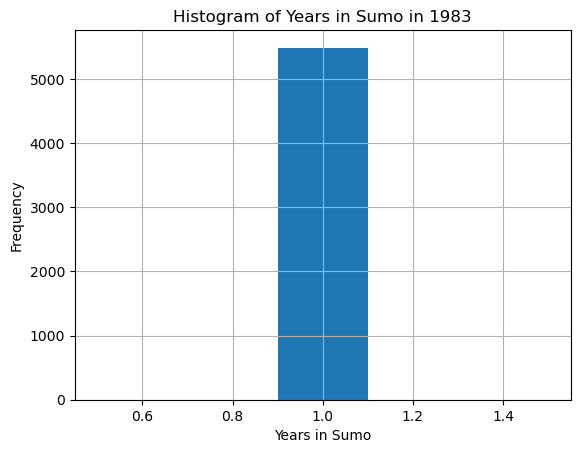

In [17]:
dfs_by_year['df1983']['rikishi1_years_in_sumo'].hist(bins=5)  # Change 'bins' to adjust the number of bars
plt.xlabel('Years in Sumo')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Sumo in 1983')
plt.show()

Indeed, that's what we get. Let's do something more interesting: the histogram for 2010.

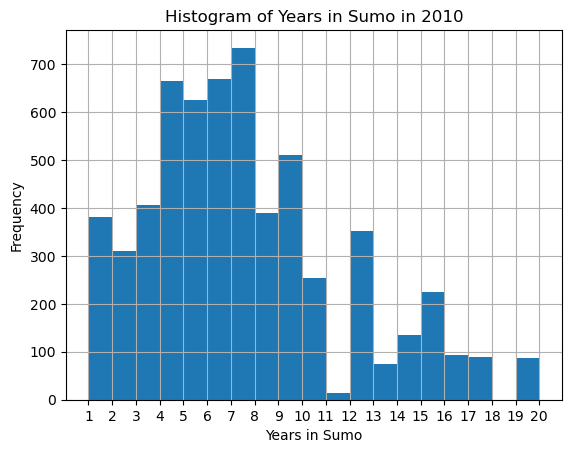

In [18]:
dfs_by_year['df2010']['rikishi1_years_in_sumo'].hist(bins=19)  # Change 'bins' to adjust the number of bars
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Years in Sumo')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Sumo in 2010')
plt.show()

Let's do a few more.

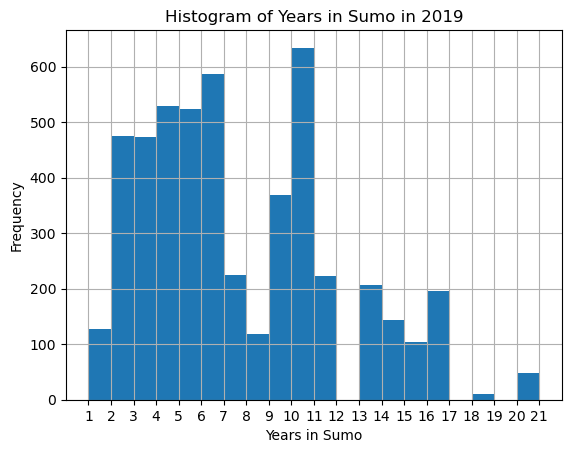

In [19]:
dfs_by_year['df2019']['rikishi1_years_in_sumo'].hist(bins=20)  # Change 'bins' to adjust the number of bars
plt.xticks(np.arange(1, 22, 1))
plt.xlabel('Years in Sumo')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Sumo in 2019')
plt.show()

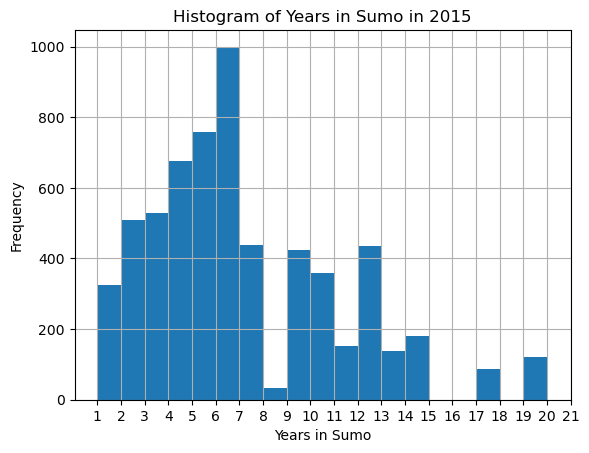

In [20]:
dfs_by_year['df2015']['rikishi1_years_in_sumo'].hist(bins=19)  # Change 'bins' to adjust the number of bars
plt.xticks(np.arange(1, 22, 1))
plt.xlabel('Years in Sumo')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Sumo in 2015')
plt.show()

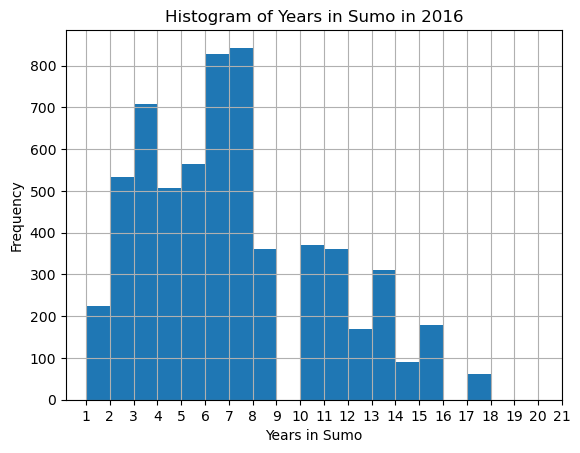

In [21]:
dfs_by_year['df2016']['rikishi1_years_in_sumo'].hist(bins=17)  # Change 'bins' to adjust the number of bars
plt.xticks(np.arange(1, 22, 1))
plt.xlabel('Years in Sumo')
plt.ylabel('Frequency')
plt.title('Histogram of Years in Sumo in 2016')
plt.show()

Notes: 

These all seem to be right skewed, which makes sense. Younger players have less experience, but I imagine that youth is also an advantage sumo.

I can't figure out how to consistently make sure that the bars are exactly 1 unit wide. There's probably a way to do this, but I don't know it. Guess: Put the number of bins equal to the range of the data. So in this last case, use 17 bins since there are data points at 1 and at 17.

-------------------------------------------

Now let's add another feature which tells us if a wrestler has 7 wins on the penultimate day of a tournament.

In [22]:
df

,index,basho,day,year,rikishi1_id,rikishi1_years_in_sumo,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_years_in_sumo,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,0,1983.01,1,1983,4140,1,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,1,Ms1e,Ofuji,1-0 (6-1),1
1,1,1983.01,1,1983,4306,1,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,1,J13w,Chikubayama,0-1 (7-8),0
2,2,1983.01,1,1983,1337,1,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,1,J13e,Shiraiwa,0-1 (3-12),0
3,3,1983.01,1,1983,4323,1,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,1,J12w,Tochitsukasa,1-0 (9-6),1
4,4,1983.01,1,1983,4097,1,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,1,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,2019,12210,5,S1e,Mitakeumi,12-3,1,yorikiri,12055,7,K1w,Endo,8-7,0
214784,4986,2019.09,15,2019,6468,14,O1w,Goeido,10-5,1,yorikiri,6599,13,O2e,Tochinoshin,6-9,0
214785,4987,2019.09,15,2019,6599,13,O2e,Tochinoshin,6-9,0,yorikiri,6468,14,O1w,Goeido,10-5,1
214786,4988,2019.09,16,2019,12191,4,S1w,Takakeisho,(12-3),0,yorikiri,12210,5,S1e,Mitakeumi,(12-3),1


In [29]:
for i in range(10000,12000):
    print(df['rikishi2_result'][i])

7-5 (9-6)
4-8 (5-10)
2-10 (3-12)
6-6 (6-9)
4-8 (5-10)
5-7 (6-9)
3-9 (4-11)
4-8 (7-8)
3-9 (5-10)
2-10 (4-11)
6-6 (8-7)
2-10 (5-10)
10-2 (11-4)
10-2 (12-3)
8-4 (10-5)
7-5 (9-6)
8-4 (11-4)
9-3 (10-5)
9-3 (10-5)
8-4 (10-5)
6-7 (8-7)
3-10 (3-12)
2-11 (4-11)
4-3
7-6 (8-7)
6-7 (8-7)
5-2
2-11 (2-13)
4-9 (4-11)
7-6 (9-6)
6-7 (7-8)
9-4 (10-5)
10-3 (10-5)
9-4 (10-5)
6-7 (7-8)
4-9 (6-9)
8-5 (10-5)
9-4 (10-5)
7-6 (8-7)
9-4 (11-4)
3-10 (3-12)
7-6 (8-7)
7-6 (8-7)
8-5 (8-7)
5-8 (5-10)
6-7 (7-8)
8-5 (10-5)
8-5 (10-5)
7-6 (7-8)
5-8 (7-8)
8-5 (9-6)
8-5 (8-7)
8-5 (9-6)
8-5 (8-7)
8-5 (8-7)
12-1 (13-2)
6-7 (6-9)
6-7 (7-8)
6-7 (8-7)
6-7 (8-7)
4-9 (5-10)
5-8 (5-10)
5-8 (5-10)
4-9 (5-10)
6-7 (7-8)
5-8 (6-9)
9-4 (9-6)
6-7 (8-7)
5-8 (5-10)
4-9 (4-11)
4-9 (4-11)
4-9 (5-10)
5-8 (7-8)
2-11 (4-11)
8-5 (10-5)
11-2 (12-3)
2-11 (3-12)
3-10 (5-10)
11-2 (11-4)
8-5 (10-5)
8-5 (9-6)
9-4 (10-5)
9-4 (10-5)
9-4 (11-4)
3-4
3-11 (3-12)
7-7 (8-7)
8-6 (8-7)
2-5
3-11 (4-11)
6-8 (7-8)
7-7 (7-8)
8-6 (9-6)
2-12 (2-13)
9-5 (10-5)
9-5 